# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [57]:
'''Assessment of bank direct marketing was performed using CRISP Data mining methodology. The data 
collected by the bank collected during 17 campaigns undertaken from may 2008 till Novermber 2010. Total of 79354 corresponding 
data was collected. 

the assessment of the data was performed using Naive Bayes, Decision tree and SVM and a performamce comparison
was drawn. based on 20 iterations performed for each of the method used, performace of the model was 
assessed by plotting ROC curve and Lift curve. Area under the ROC indicated SVM model was the best 
performer and decision tree performed significantly less efficiently. 

For the current analysis, classification methods including Logistinc regression, KNN, DT and SVM will be 
performed and comparison will be presented. '''

'Assessment of bank direct marketing was performed using CRISP Data mining methodology. The data \ncollected by the bank collected during 17 campaigns undertaken from may 2008 till Novermber 2010. Total of 79354 corresponding \ndata was collected. \n\nthe assessment of the data was performed using Naive Bayes, Decision tree and SVM and a performamce comparison\nwas drawn. based on 20 iterations performed for each of the method used, performace of the model was \nassessed by plotting ROC curve and Lift curve. Area under the ROC indicated SVM model was the best \nperformer and decision tree performed significantly less efficiently. \n\nFor the current analysis, classification methods including Logistinc regression, KNN, DT and SVM will be \nperformed and comparison will be presented. '

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [521]:
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, log_loss, roc_curve,\
    plot_confusion_matrix, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
import time
from tabulate import tabulate
from sklearn.svm import SVC

In [522]:
df = pd.read_csv('/Users/jetindersingh/Downloads/module_17_starter/data/bank-additional-full.csv', sep = ';')

In [523]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [524]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [525]:
'''the objective of the analysis is to identify set of potential customers based on the 
features collected in the database. '''

'the objective of the analysis is to identify set of potential customers based on the \nfeatures collected in the database. '

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [526]:
df['job'] = df['job'].map({'housemaid' : 1, 'services': 2, 'admin.':3, 'blue-collar':4, 'technician':5,
       'retired':6, 'management':7, 'unemployed':8, 'self-employed':9, 'unknown':10,
       'entrepreneur':11, 'student':12})
df['marital'] = df['marital'].map({'married':2, 'single':1, 'divorced':3, 'unknown':4})
df['education'] = df['education'].map({'basic.4y':1, 'high.school':2, 'basic.6y':3, 'basic.9y':4,'professional.course':5, 'unknown':8, 'university.degree':6,\
       'illiterate':7})
df['default'] = df['default'].map({'no': 1, 'unknown':0, 'yes':2})
df['housing'] = df['housing'].map({'no':1, 'yes':2, 'unknown':0})
df['loan'] = df['loan'].map({'no':1, 'yes':2, 'unknown':0})
df['contact'] = df['contact'].map({'telephone':0, 'cellular':1})
df['month'] = df['month'].map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'mar':3, 'apr':4,'sep':9})
df['day_of_week'] = df['day_of_week'].map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5})
df['poutcome'] = df['poutcome'].map({'nonexistent':1, 'failure':2, 'success':3})
df['y'] = df['y'].map({'no':0, 'yes':1})

In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [528]:
y = df['y']

In [529]:
X = df.drop(columns=['y'])
X.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.030413,0.388687,-0.071575,-0.164910,-0.000987,-0.006048,-0.007021,0.077265,-0.018486,-0.000866,0.004594,-0.034369,0.024365,0.026371,-0.000371,0.000857,0.129372,0.010767,-0.017725
job,0.030413,1.000000,-0.029137,0.176296,0.012964,0.003577,-0.008555,0.017054,0.055813,-0.001608,0.009575,-0.017085,-0.051677,0.051348,0.049070,-0.083007,-0.046067,0.022933,-0.072497,-0.084981
marital,0.388687,-0.029137,1.000000,-0.072002,-0.076823,-0.012250,-0.006412,-0.053576,0.016981,-0.014350,-0.007585,0.010060,0.036082,-0.035932,-0.036995,0.081460,0.054981,0.032792,0.089356,0.084199
education,-0.071575,0.176296,-0.072002,1.000000,0.115766,0.015750,0.006440,0.077727,0.096163,0.011627,-0.012820,-0.001004,-0.034513,0.024100,0.025013,-0.027154,-0.060767,0.068339,-0.020330,-0.024826
default,-0.164910,0.012964,-0.076823,0.115766,1.000000,0.017429,0.007792,0.135698,0.084984,0.003915,0.011478,-0.033077,-0.079987,0.102630,0.108394,-0.203061,-0.168335,-0.026249,-0.195079,-0.189544
housing,-0.000987,0.003577,-0.012250,0.015750,0.017429,1.000000,0.228650,0.083498,0.033748,-0.009221,-0.004850,-0.009768,-0.010376,0.017647,0.021599,-0.055645,-0.079528,-0.033586,-0.054698,-0.040855
loan,-0.006048,-0.008555,-0.006412,0.006440,0.007792,0.228650,1.000000,0.020520,0.003029,0.000662,0.001987,0.004908,-0.000857,-0.003371,-0.000181,-0.000138,-0.011616,-0.015059,-0.001540,0.004260
contact,-0.007021,0.017054,-0.053576,0.077727,0.135698,0.083498,0.020520,1.000000,0.324315,-0.019583,0.026657,-0.077368,-0.117970,0.212848,0.226813,-0.393584,-0.591474,-0.251614,-0.399773,-0.269155
month,0.077265,0.055813,0.016981,0.096163,0.084984,0.033748,0.003029,0.324315,1.000000,-0.006959,-0.019302,-0.030635,-0.079556,0.063754,0.060841,0.058874,-0.150350,0.264227,0.163411,0.132697
day_of_week,-0.018486,-0.001608,-0.014350,0.011627,0.003915,-0.009221,0.000662,-0.019583,-0.006959,1.000000,0.010549,0.015098,0.006765,0.004013,0.003279,-0.004401,-0.004586,-0.000099,-0.005552,-0.000734


<AxesSubplot:>

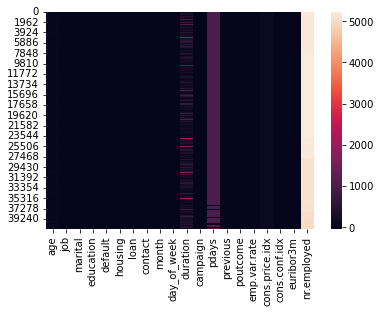

In [530]:
sns.heatmap(X)

In [531]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [532]:
df_scale = StandardScaler().fit_transform(X,y)
col = df.columns[:-1]
#col[:-1]
X = pd.DataFrame(df_scale, columns = col)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [533]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [534]:
lr_t0 = time.time()
lg_reg = LogisticRegression(penalty= 'elasticnet' , max_iter= 1000, random_state= 42, solver= 'saga', l1_ratio= 0.5).fit(X_train,y_train)
print('LR fit time', time.time()-lr_t0)

LR fit time 0.6890232563018799


### Problem 9: Score the Model

What is the accuracy of your model?

In [535]:
lr_t1 = time.time()
lg_ypred = lg_reg.predict(X_test)
lg_tpred = time.time() - lr_t1
lg_trainpred = lg_reg.predict(X_train)
lg_trainAcc = accuracy_score(lg_trainpred, y_train)
lg_Accuracy = accuracy_score(lg_ypred, y_test)
lg_f1 = f1_score(y_test,lg_ypred,pos_label=1)
lg_scorePre = precision_score(y_test, lg_ypred)
lg_scoreAcc = accuracy_score(y_test, lg_ypred)
print({'lg_Test_Accuracy':lg_Accuracy})
print({'lg_g1': lg_f1})
print({'lg_scorePre': lg_scorePre})
print({'lg_scoreAcc': lg_scoreAcc})
print('time to predict :', lg_tpred)
print('lg_train_Accuracy : ', lg_trainAcc)

{'lg_Test_Accuracy': 0.9082301529497451}
{'lg_g1': 0.4973404255319149}
{'lg_scorePre': 0.6572934973637962}
{'lg_scoreAcc': 0.9082301529497451}
time to predict : 0.004115104675292969
lg_train_Accuracy :  0.910288315629742


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


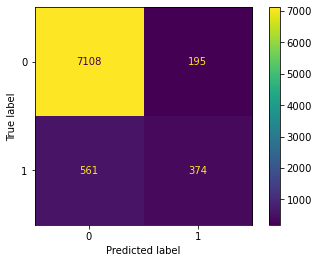

In [536]:
plot_confusion_matrix(lg_reg, X_test, y_test)

False Positive Rates:  [0.         0.02670136 1.        ]
True Positive Rates:  [0.  0.4 1. ]


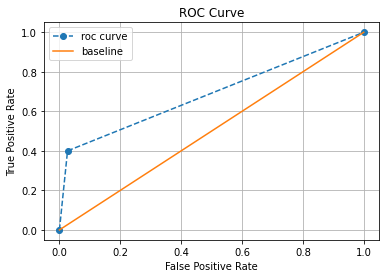

In [537]:
fpr, tpr, thresroc = roc_curve(y_test, lg_ypred, pos_label= 1)
print('False Positive Rates: ', fpr[:3])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid();

KNN Classifier

In [540]:
knn_t0 = time.time()
df_knn = KNeighborsClassifier()
param = dict(n_neighbors = list(range(1,21)))
knn_grid = GridSearchCV(df_knn, param_grid= param, cv = 5, scoring= 'accuracy', verbose= 0)
knn = knn_grid.fit(X_train, y_train)
knn_fitTime = time.time()-knn_t0
#print('knn fit time :', knn_fitTime )

In [478]:
knn_t1 = time.time()
knn_ypred = knn_grid.predict(X_test)
knn_tpred = time.time() - knn_t1
knn_grid.score(X_test, y_test)
print(knn_tpred)

4.816056966781616


In [479]:
print(knn_grid.best_score_)

0.9061608497723823


In [507]:
knn_Accuracy = accuracy_score(knn_ypred, y_test)
knn_f1 = f1_score(y_test,knn_ypred,pos_label=1)
knn_scorePre = precision_score(y_test, knn_ypred)
knn_scoreAcc = accuracy_score(y_test, knn_ypred)
knn_train_Acc = accuracy_score(knn_grid.predict(X_train), y_train)

print({'knn_Accuracy':knn_Accuracy})
print({'knn_f1 :', knn_f1})
print({'knn_scorePre :', knn_scorePre})
print({'knn_scoreAcc :', knn_scoreAcc})
print({'knn_train_Acc :',  knn_scoreAcc})

{'knn_Accuracy': 0.9032532168001942}
{0.4632996632996633, 'knn_f1 :'}
{0.6254545454545455, 'knn_scorePre :'}
{0.9032532168001942, 'knn_scoreAcc :'}
{0.9032532168001942, 'knn_train_Acc :'}


Decision Tree Classifier

In [491]:
dtc_t0 = time.time()
dtc_param = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
dtc = DecisionTreeClassifier(random_state= 42)
dtc_grid = GridSearchCV(estimator = dtc, param_grid = dtc_param, cv = 5, verbose= True).fit(X_train, y_train)
dtc_train = time.time() - dtc_t0
dtc_t1 = time.time()
dtc_ypred = dtc_grid.predict(X_test)
dtc_tpred = time.time() - dtc_t1
dtc_bscr = dtc_grid.best_score_
print(dtc_bscr)

print(f'dtc_train : ', dtc_train)
print(f'dtc_tpred : ', dtc_tpred)
#dtc_grid.score(y_test, dtc_ypred)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
0.905948406676783
dtc_train :  8.902613639831543
dtc_tpred :  0.0015380382537841797


In [514]:
dtc_test_Accuracy = accuracy_score(dtc_ypred, y_test)
print('dtc_Accuracy:', dtc_Accuracy)

dtc_train_Accuracy = accuracy_score(dtc_grid.predict(X_train), y_train)
print('dtc_train_Accuracy:', dtc_train_Accuracy)

dtc_f1 = f1_score(y_test,dtc_ypred,pos_label=1)
print(f'dtc_f1:',  dtc_f1)

dtc_scorePre = precision_score(y_test, dtc_ypred)
print(f'dtc_scorePre:', dtc_scorePre)

dtc_scoreAcc = accuracy_score(y_test, dtc_ypred)
print(f'dtc_scoreAcc:', dtc_scoreAcc)

dtc_Accuracy: 0.8986404467103666
dtc_train_Accuracy: 0.9057359635811836
dtc_f1: 0.42925495557074506
dtc_scorePre: 0.5946969696969697
dtc_scoreAcc: 0.8986404467103666


In [501]:
dtc_bparam = dtc_grid.best_params_
print (dtc_bparam)

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto'}


Support Vector Classifier

In [550]:
svc = SVC(kernel='linear', random_state= 42)
svc_t0 = time.time()
pred_svc = svc.fit(X_train, y_train)
svc_pred_time = time.time()-svc_t0
print(svc_pred_time)
svc_ypred = svc.predict(X_test)
svc_train_pred = svc.predict(X_train)

31.82844114303589


In [551]:
svc_test_Accuracy = accuracy_score(svc_ypred, y_test)
print('svc_Accuracy:', svc_test_Accuracy)

svc_train_Accuracy = accuracy_score(svc_train_pred, y_train)
print('svc_train_Accuracy:', svc_train_Accuracy)

svc_f1 = f1_score(y_test,svc_ypred,pos_label=1)
print(f'svc_f1:',  svc_f1)

svc_scorePre = precision_score(y_test, svc_ypred)
print(f'svc_scorePre:', svc_scorePre)

svc_scoreAcc = accuracy_score(y_test,svc_ypred)
print(f'svc_scoreAcc:', svc_scoreAcc)

svc_Accuracy: 0.8973051711580481
svc_train_Accuracy: 0.9005159332321699
svc_f1: 0.36006051437216335
svc_scorePre: 0.6149870801033591
svc_scoreAcc: 0.8973051711580481


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [552]:
column_names = ['Model', 'Train Time', 'Train Accuracy', ' Test Accuracy']
tab_data = [['Logistic Regression', lg_tpred, lg_trainAcc, lg_Accuracy],
            ['KNeighborsClassifier', knn_tpred, knn_train_Acc, knn_Accuracy ],
            ['Decision Tree Classifier', dtc_train, dtc_train_Accuracy,dtc_tpred ],
            ['Support Vrector Machine', svc_pred_time, svc_test_Accuracy, svc_train_Accuracy ]]


print(tabulate(tab_data, headers = column_names))

Model                       Train Time    Train Accuracy     Test Accuracy
------------------------  ------------  ----------------  ----------------
Logistic Regression          0.0041151          0.910288        0.90823
KNeighborsClassifier         4.81606            0.914628        0.903253
Decision Tree Classifier     8.90261            0.905736        0.00153804
Support Vrector Machine     31.8284             0.897305        0.900516


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions